In [1]:
import sys
sys.path.append('../src')

import redshift_cross_correlation as mrc
import redshift_cc_sdss as crs

In [2]:
template_spectra = crs.get_template_spectra('ALL')

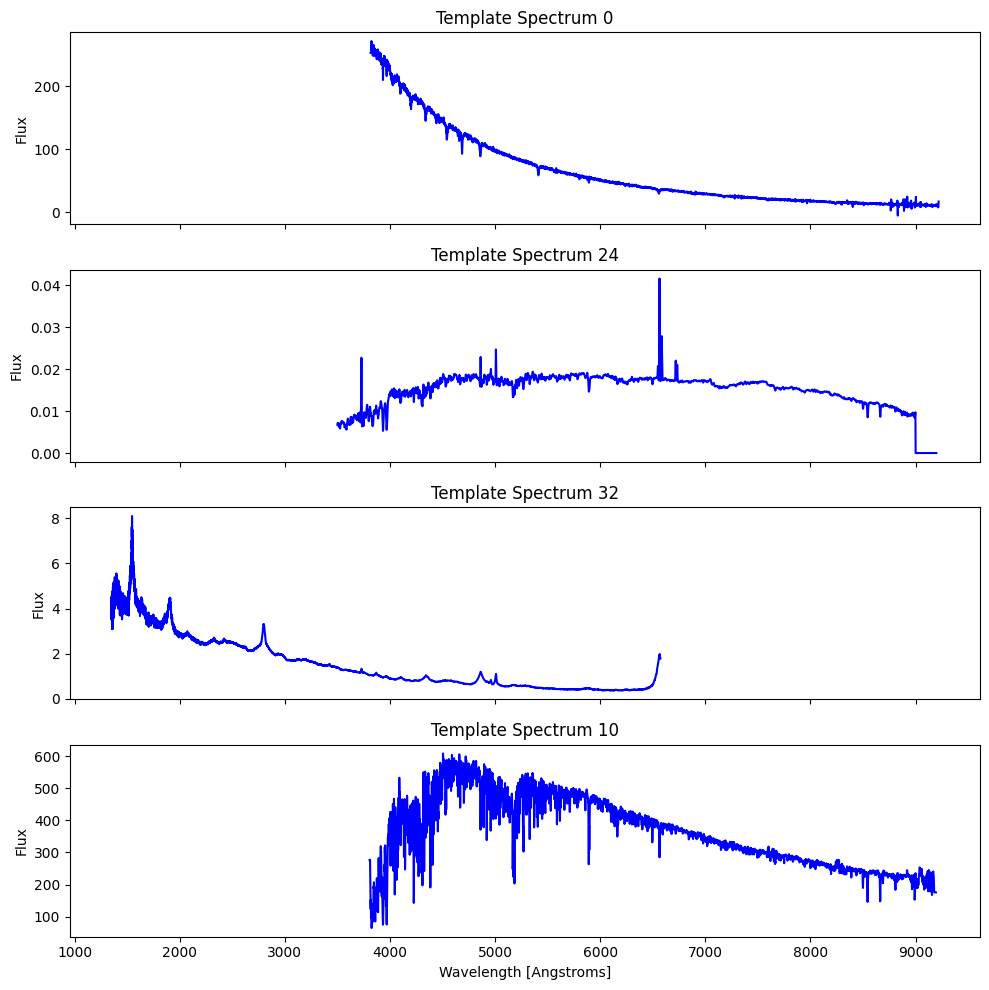

In [35]:
import matplotlib.pyplot as plt

# Chosen template indices
indices = [0, 24, 32, 10]

fig, axs = plt.subplots(len(indices), 1, figsize=(10, 10), sharex=True)

for i, idx in enumerate(indices):
    wavelength, flux = template_spectra[idx]
    axs[i].plot(wavelength, flux, color='blue')
    axs[i].set_ylabel('Flux')
    axs[i].set_title(f'Template Spectrum {idx}')

axs[-1].set_xlabel('Wavelength [Angstroms]')
plt.tight_layout()
plt.show()


In [55]:
flux, wavelength = template_spectra[23][1][:4100], template_spectra[23][0][:4100]
#mrc.cross_correlate_redshift(wavelength, flux, template_spectra)
np.max(wavelength)
print(np.min(flux), np.max(flux), np.std(flux))


0.0025665 0.0200015 0.0039207838


4197


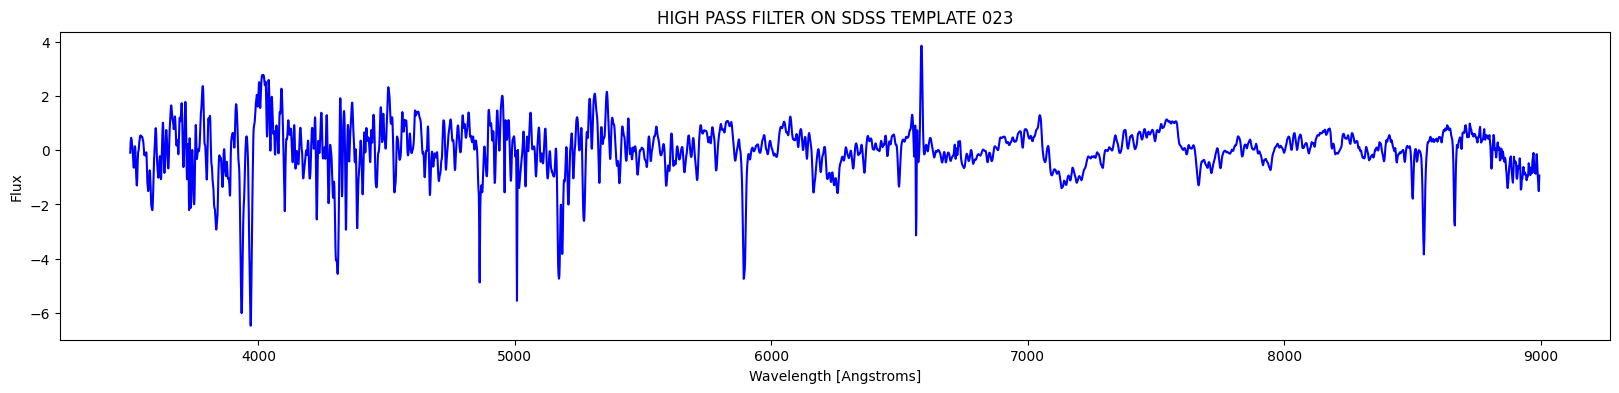

In [63]:
import matplotlib.pyplot as plt

print(len(template_spectra[23][0]))
plt.figure(figsize=(20,4))
plt.title('HIGH PASS FILTER ON SDSS TEMPLATE 023')
plt.ylabel('Flux')
plt.xlabel('Wavelength [Angstroms]')
plt.plot(mrc.log_wavelength_grid(np.min(template_spectra[23][0][:4100]), np.max(template_spectra[23][0][:4100]), 4100), mrc.normalize_segment(mrc.high_pass(template_spectra[23][1][:4100])), color='blue')

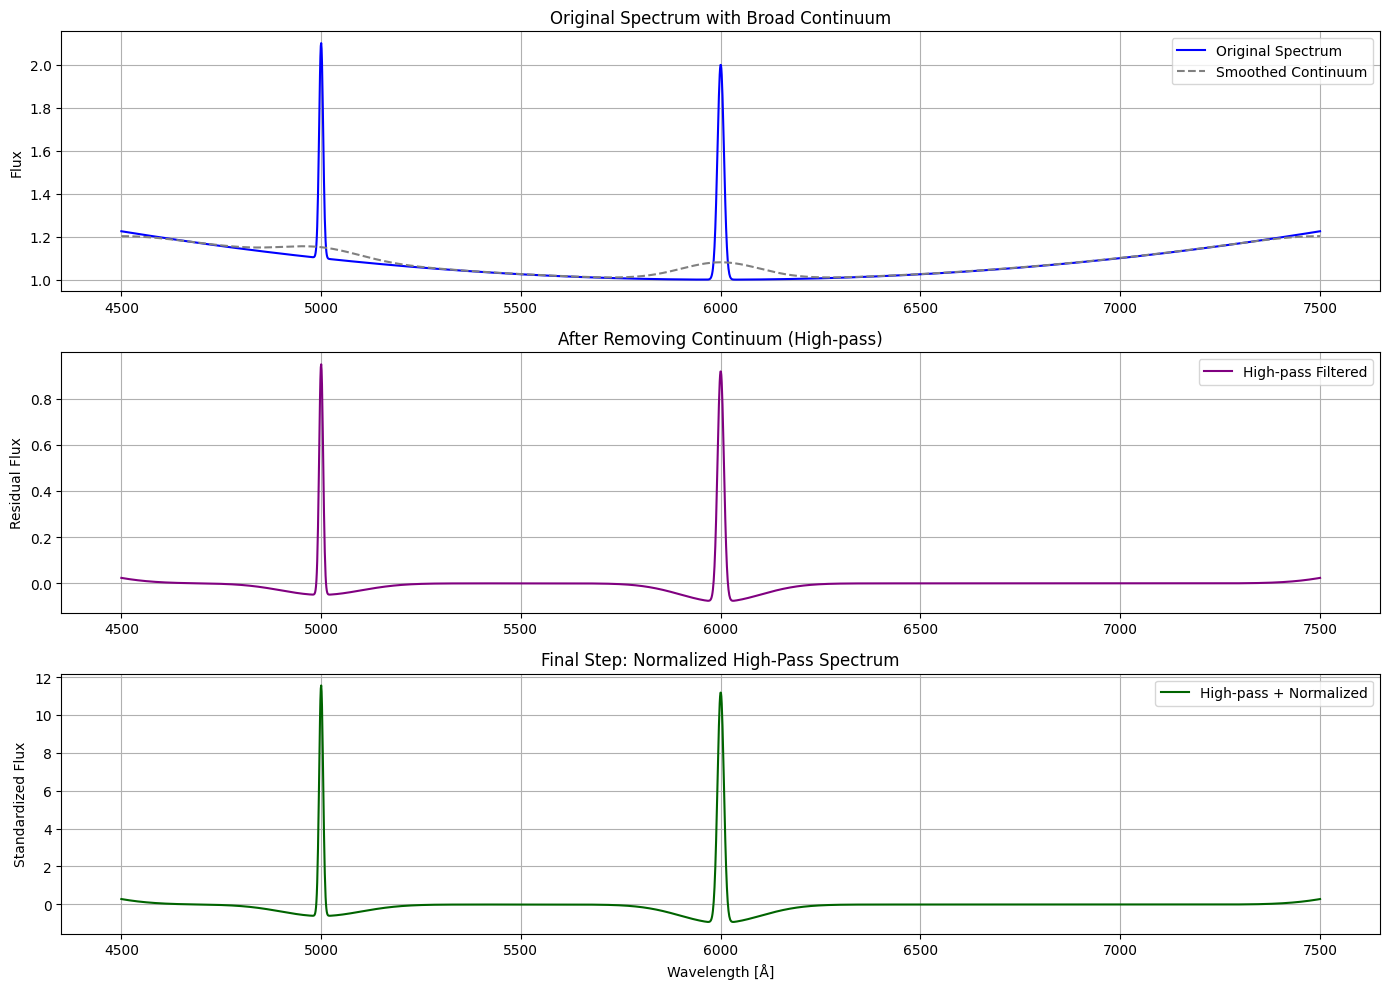

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Define rest-frame wavelength grid and emission lines
wl = np.linspace(4500, 7500, 3000)
line1 = np.exp(-0.5 * ((wl - 5000) / 5) ** 2)
line2 = np.exp(-0.5 * ((wl - 6000) / 8) ** 2)

# Add a curved continuum to simulate background brightness trend
continuum = 0.001 * (wl - 6000) ** 2 / 1e4 + 1.0

# Total flux = continuum + emission lines
flux = continuum + line1 + line2

# Apply high-pass filtering
smoothed = gaussian_filter1d(flux, sigma=100)
high_passed = flux - smoothed

# Normalize
def normalize(flux):
    flux_mean = np.nanmean(flux)
    flux_std = np.nanstd(flux)
    return (flux - flux_mean) / flux_std if flux_std > 0 else flux

flux_normalized = normalize(flux)
high_passed_normalized = normalize(high_passed)

# Plot all stages
plt.figure(figsize=(14, 10))

# Original spectrum
plt.subplot(3, 1, 1)
plt.plot(wl, flux, label='Original Spectrum', color='blue')
plt.plot(wl, smoothed, '--', label='Smoothed Continuum', color='gray')
plt.title("Original Spectrum with Broad Continuum")
plt.ylabel("Flux")
plt.legend()
plt.grid(True)

# High-pass filtered
plt.subplot(3, 1, 2)
plt.plot(wl, high_passed, label='High-pass Filtered', color='purple')
plt.title("After Removing Continuum (High-pass)")
plt.ylabel("Residual Flux")
plt.legend()
plt.grid(True)

# Normalized high-pass
plt.subplot(3, 1, 3)
plt.plot(wl, high_passed_normalized, label='High-pass + Normalized', color='darkgreen')
plt.title("Final Step: Normalized High-Pass Spectrum")
plt.xlabel("Wavelength [Å]")
plt.ylabel("Standardized Flux")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
flux, wavelength = crs.get_spectrum(plate=266, mjd=51602, fiberID=9)
mrc.cross_correlate_redshift(wavelength, flux, template_spectra)


Spectrum retrieved!
Template 000 | z = 0.00000 | score = 299.543
Template 000 | z = 0.00050 | score = 308.714
Template 000 | z = 0.00100 | score = 420.411
Template 000 | z = 0.00150 | score = 385.248
Template 000 | z = 0.00200 | score = 368.517
Template 000 | z = 0.00250 | score = 332.828
Template 000 | z = 0.00300 | score = 471.365
Template 000 | z = 0.00350 | score = 543.255
Template 000 | z = 0.00400 | score = 583.774
Template 000 | z = 0.00450 | score = 625.049
Template 000 | z = 0.00500 | score = 604.034
Template 000 | z = 0.00550 | score = 596.197
Template 000 | z = 0.00600 | score = 547.041
Template 000 | z = 0.00650 | score = 489.967
Template 000 | z = 0.00700 | score = 411.388
Template 000 | z = 0.00750 | score = 422.747
Template 000 | z = 0.00800 | score = 398.258
Template 000 | z = 0.00850 | score = 326.524
Template 000 | z = 0.00900 | score = 324.394
Template 000 | z = 0.00950 | score = 257.995
Template 000 | z = 0.01000 | score = 247.547
Template 000 | z = 0.01050 | score 

(31, np.float64(2.8200000000000016), np.float64(2979.7659375170606))

In [3]:
template_spectra = crs.get_template_spectra('ALL')
flux, wavelength = crs.get_spectrum(plate=309, mjd=51994, fiberID=568)
_, _, _, b = mrc.cross_correlate_redshift(wavelength, flux, template_spectra)
# Why is it doing this again. Fix later.
# Could add a restraint that if redshift is below 0.299 then it isn't a real redshift, because that is the lowest redshift quaser found.

Spectrum retrieved!
Template 000 | z = 0.00000 | score = -2369.017
Template 000 | z = 0.00050 | score = -2268.471
Template 000 | z = 0.00100 | score = -2274.739
Template 000 | z = 0.00150 | score = -2246.187
Template 000 | z = 0.00200 | score = -2254.272
Template 000 | z = 0.00250 | score = -2240.111
Template 000 | z = 0.00300 | score = -2266.538
Template 000 | z = 0.00350 | score = -2274.964
Template 000 | z = 0.00400 | score = -2250.529
Template 000 | z = 0.00450 | score = -2243.036
Template 000 | z = 0.00500 | score = -2231.726
Template 000 | z = 0.00550 | score = -2255.284
Template 000 | z = 0.00600 | score = -2197.605
Template 000 | z = 0.00650 | score = -2235.337
Template 000 | z = 0.00700 | score = -2289.902
Template 000 | z = 0.00750 | score = -2242.147
Template 000 | z = 0.00800 | score = -2284.827
Template 000 | z = 0.00850 | score = -2302.339
Template 000 | z = 0.00900 | score = -2249.733
Template 000 | z = 0.00950 | score = -2288.063
Template 000 | z = 0.01000 | score = -22

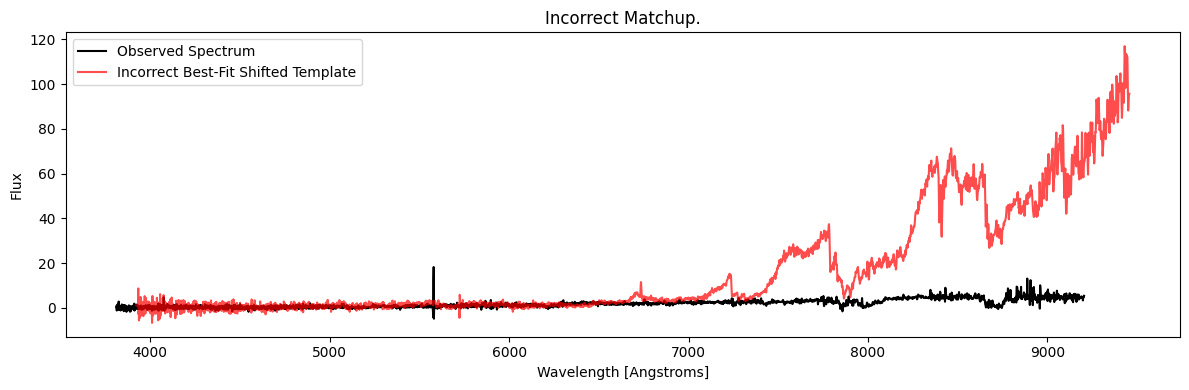

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(wavelength, flux, label='Observed Spectrum', color='black')
plt.plot(b[0], b[1], label='Incorrect Best-Fit Shifted Template', color='red', alpha=0.7)
plt.title('Incorrect Matchup.')
plt.xlabel('Wavelength [Angstroms]')
plt.ylabel('Flux')
plt.legend()
plt.tight_layout()
plt.show()


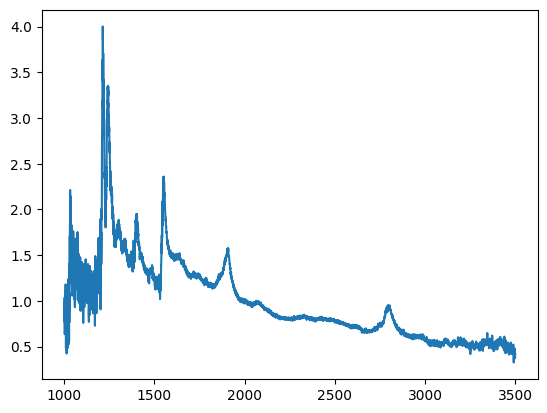

In [8]:
plt.plot(template_spectra[0][0], template_spectra[0][1])

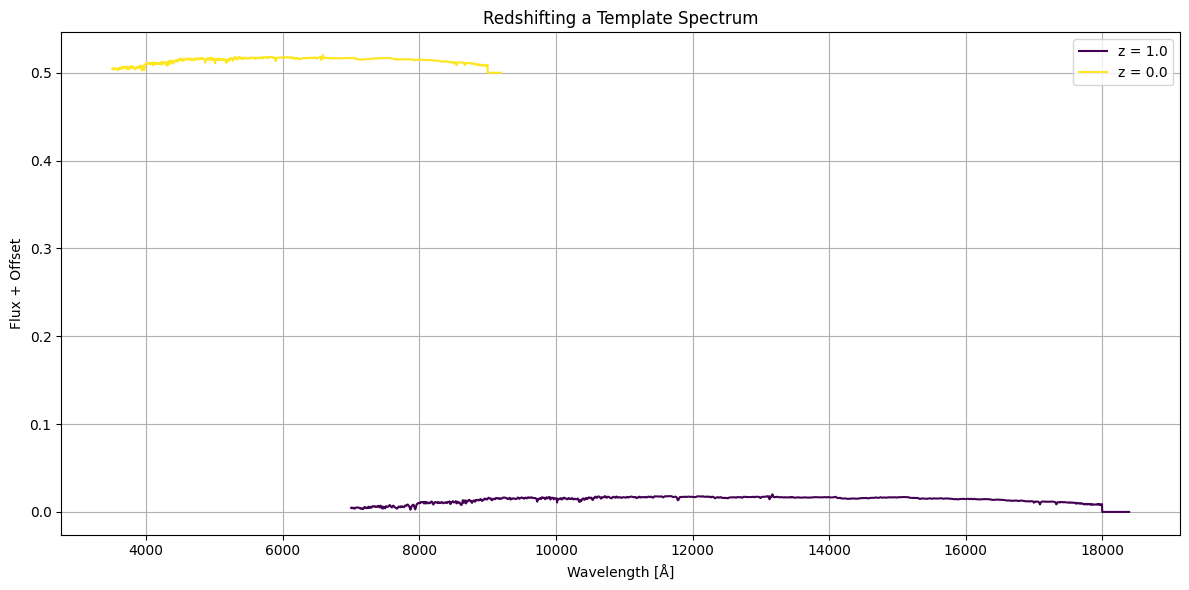

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
def plot_redshifted_templates(template_wavelength, template_flux, z_values=[0.0, 1.0, 2.0], offset=0.5):
    """
    Plot a template spectrum redshifted by given z values.
    
    Parameters:
        template_wavelength: array-like
            Wavelength array of the template.
        template_flux: array-like
            Flux array of the template.
        z_values: list of float
            Redshift values to apply to the template.
        offset: float
            Vertical offset between redshifted plots for clarity.
    """
    plt.figure(figsize=(12, 6))
    colors = plt.cm.viridis(np.linspace(0, 1, len(z_values)))

    for i, z in enumerate(z_values):
        shifted_wavelength = template_wavelength * (1 + z)
        plt.plot(shifted_wavelength, template_flux + i * offset, label=f"z = {z:.1f}", color=colors[i])

    plt.title("Redshifting a Template Spectrum")
    plt.xlabel("Wavelength [Å]")
    plt.ylabel("Flux + Offset")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Demonstration using the same mock spectrum
plot_redshifted_templates(template_spectra[23][0], template_spectra[23][1], z_values=[1.0, 0])
b

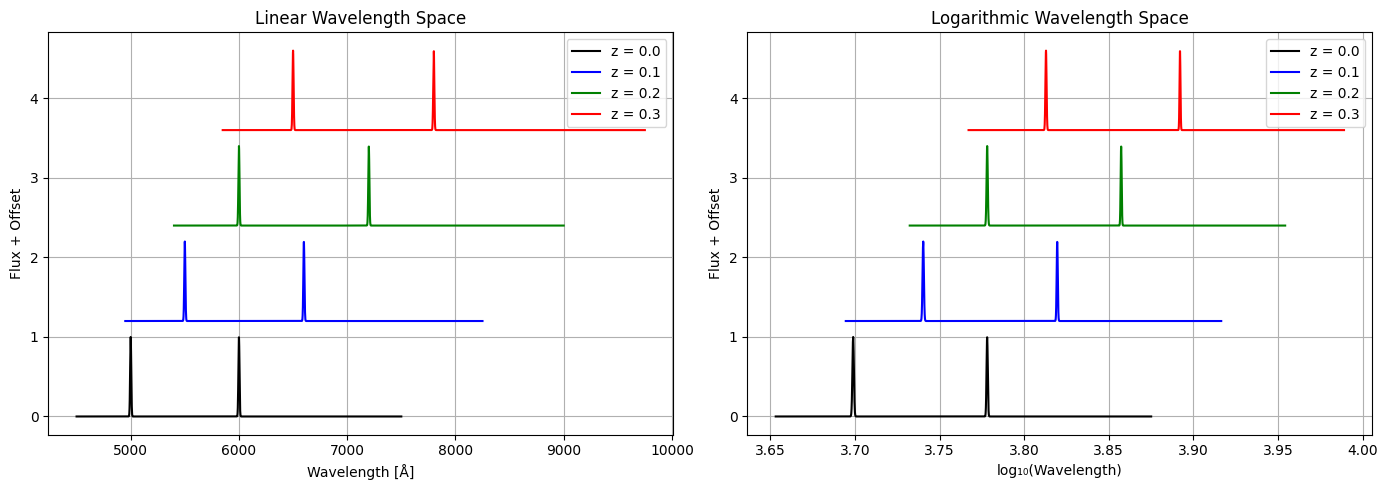

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Gaussian emission line function
def gaussian_line(wavelength, center, width=5):
    return np.exp(-0.5 * ((wavelength - center) / width) ** 2)

# Rest-frame wavelength grid and redshift values
wl_rest = np.linspace(4500, 7500, 3000)
z_vals = [0.0, 0.1, 0.2, 0.3]
colors = ['black', 'blue', 'green', 'red']
offset = 1.2

# Emission line centers (rest-frame)
line1_center = 5000
line2_center = 6000

# --- Plot 1: Linear Wavelength Space ---
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
for i, z in enumerate(z_vals):
    wl_shifted = wl_rest * (1 + z)
    flux1 = gaussian_line(wl_shifted, center=line1_center * (1 + z))
    flux2 = gaussian_line(wl_shifted, center=line2_center * (1 + z))
    total_flux = flux1 + flux2
    plt.plot(wl_shifted, total_flux + i * offset, label=f'z = {z}', color=colors[i])
plt.title("Linear Wavelength Space")
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux + Offset")
plt.grid(True)
plt.legend()

# --- Plot 2: Logarithmic Wavelength Space ---
plt.subplot(1, 2, 2)
for i, z in enumerate(z_vals):
    wl_shifted = wl_rest * (1 + z)
    flux1 = gaussian_line(wl_shifted, center=line1_center * (1 + z))
    flux2 = gaussian_line(wl_shifted, center=line2_center * (1 + z))
    total_flux = flux1 + flux2
    log_wl = np.log10(wl_shifted)
    plt.plot(log_wl, total_flux + i * offset, label=f'z = {z}', color=colors[i])
plt.title("Logarithmic Wavelength Space")
plt.xlabel("log₁₀(Wavelength)")
plt.ylabel("Flux + Offset")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
